### Fill in group number and member names:

In [ ]:
GROUP = "13"
NAME1 = "Hampus Öhman"
NAME2 = "Rasmus Bäcklund"

# Optimization for learning - FRTN50

## Assignment 2

The purpose of this assignment is to empirically explore some convergence and implicit regularization properties of the stochastic gradient decent (SGD) method and some of its variants. These properties are mainly explored by considering simple polynomial fitting problems in $\mathbb{R}$ to facilitate easy comparison with known theoretical results and easy visualization. We will also compare the same fitting problem with multi-layer perceptrons also known as fully connected feedforward neural networks.

Below are the tasks that you need to solve. Keep this in mind:
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

---
### Exercise 1: Polynomial fitting in $\mathbb{R}$ using least squares with a polynomial feature map

Consider fitting the points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$ to a polynomial model $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ using the method of least squares. Here, the model is given by

$$
\begin{align}
    m(x;\theta) = \theta^{T}\phi(x)
\end{align}
$$

where $\theta\in\mathbb{R}^{n+1}$ is the parameter of the model and $\phi:\mathbb{R}\rightarrow\mathbb{R}^{n+1}$ is a polynomial feature map given by

$$
\begin{align}
    \phi(x) = 
    \begin{bmatrix}
    1 \\
    x \\
    \vdots \\
    x^{n}
    \end{bmatrix}
\end{align}
$$
for each $x\in\mathbb{R}$.

I.e. $m(\cdot;\theta)$ is a polynomial (in particular nonlinear) model of degree $n$ and is linear in the parameter $\theta$. If we compare to deep learning, the model $m(\cdot;\theta)$ would have a specific structure but would be nonlinear in the parameter $\theta$ in general.

The method of least squares involves solving the optimization problem

$$
\begin{equation}\label{eq:1}\tag{1}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \sum_{i=1}^{N}(m(x_{i};\theta) - y_{i})^{2} = \frac{1}{N} \sum_{i=1}^{N}\underbrace{(\theta^{T}\phi(x_{i}) - y_{i})^{2}}_{=f_{i}(\theta)} = \frac{1}{N} \sum_{i=1}^{N}f_{i}(\theta) 
\end{aligned}
\end{equation}
$$

giving an optimal point $\theta^{*}\in\mathbb{R}^{n+1}$, and letting $m(\cdot;\theta^{*})$ be the fitted model. If we let 

$$
\begin{align}
    X = 
    \begin{bmatrix}
    \phi(x_{1})^{T} \\
    \vdots \\
    \phi(x_{N})^{T} 
    \end{bmatrix}\in\mathbb{R}^{N \times (n+1)},  \quad \text{ and } \quad
    Y = 
    \begin{bmatrix}
    y_{1} \\
    \vdots \\
    y_{N}
    \end{bmatrix}\in\mathbb{R}^{N},
\end{align}
$$

optimization problem $\eqref{eq:1}$ can be written as 

$$
\begin{equation}\label{eq:2}\tag{2}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} = f(\theta).
\end{aligned}
\end{equation}
$$

Since the model $m(\cdot;\theta)$ is linear in $\theta$, the function $f$ is convex in $\theta$. This is not the case in deep learning, since the model $m(\cdot;\theta)$ would not be linear in $\theta$ in general.

If the points $x_{i}$ in $\{(x_{i},y_{i})\}_{i=1}^{N}$ are distinct, which is the case in our analysis, it holds that 

$$
\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}
$$
(See [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for more info.) In particular,
1. if $N < n+1$, optimization problem $\eqref{eq:2}$ is underdetermined, $X X^{T}$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$,
2. if $N > n+1$, optimization problem $\eqref{eq:2}$ is overdetermined and $X^{T} X$ is invertible,
3. if $N = n+1$, both $X X^{T}$ and $X^{T} X$ are invertible and optimization problem $\eqref{eq:2}$ is neither underdetermined nor overdetermined.

You are allowed to assume these facts as given.

---
__a)__ A model is sometimes said to be overparameterized if it has more parameters than data points. By the same token, a model is said to be underparameterized if it has less parameters than data points. 

- Suppose that our model is overparameterized. Which case of 1., 2. and 3. above does this corresponds to? 
- Suppose that our model is underparameterized. Which case of 1., 2. and 3. above does this corresponds to? 

Motivate your answer. It is crucial that you get this right to avoid confusion later.

__Solution:__ 

_Fill in your solution here!_

If $N < n+1$ the optimization problem is overparameterized, since the number of parameters $n+1$ is larger than the number of $N$ data points. This corresponds to case 1 and that the problem is underdetermined.

If $N > n+1$ the optimization problem is underparameterized, since the number of parameters $n+1$ is smaller than the number of $N$ data points. This corresponds to case 1 and that the problem is overdetermined.

---
__b)__ Find $\nabla f$, $\nabla f_{i}$ and $\nabla^{2}f$.

Carefully motivate your answer.

__Solution:__ 

_Fill in your solution here!_ 

The 2-norm is defined as $\|x\|_2^2= \left (\left( \sum_{k=1}^n |x|^2 \right )^{1/2}\right )^2$, with the gradient $\nabla \|x\|_2^2 = 2x$. Thus, we get:

$\nabla f = \frac{2}{N}X^T(X\theta - Y)$

$\nabla f_i = 2 \phi(x_i)(\theta^\top\phi(x_i) - y_i)$ 

$\nabla^2 f = \frac {2}{N} X^\top X$

---
__c)__ Since $f$ is convex and differentiable, all optimal points $\theta^{*}\in\mathbb{R}^{n+1}$ to the least squares problem are fully characterized by the condition that

$$
\begin{align}
    \nabla f (\theta^{*}) = 0.
\end{align}
$$

Suppose that the least squares problem is underparameterized. 

- Show that there exists a solution $\theta^{*}$
- Conclude that it is unique
- Find a expression for $f(\theta^{*})$

Carefully motivate your answer.

__Solution:__ 

_Fill in your solution here!_

We set $\nabla f (\theta^{*}) = 0$ and get:

\begin{align}
    \frac{2}{N} X^{\top} X \theta-X^{\top} Y=0 \Leftrightarrow \theta=\frac{N}{2}\left(X^{\top} X\right)^{-1} X^{\top} Y
\end{align}

Since the least squares problem is underparameterized we have that $(X^{\top} X)$ is invertible according to case $2$ above. 

It is unique since $f$ is convex and differentiable. 

Plugging in the expression for $\theta^*$ in $f$ gives us:
\begin{align}
    f = \frac{1}{N} \left\lVert \frac{N}{2}X\left(X^{\top} X\right)^{-1} X^{\top} Y - Y \right\rVert_{2}^{2}
\end{align}

---
__d)__ Suppose instead that the least squares problem is overparameterized. Let $\theta^{*}\in\mathbb{R}^{n+1}$. Show that $\theta^{*}$ is a solution to the least squares problem if and only if $X\theta^{*} = Y$. I.e. show that:
- If $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$.
- If $X\theta^{*} = Y$, then $\theta^{*}$ is a solution to the least squares problem.

Hence, the solution set is an affine set that can be written as $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$.
- Prove that the set $\Theta^{*}$ is affine.

Carefully motivate your answer.

_Hints:_ Note that $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$. Moreover, what can be said in the overparameterized case? What is the definition of an affine set?

__Solution:__ 

_Fill in your solution here!_

If $\theta^*$ is a solution to the least squares problem, we know that $\nabla f (\theta^*)=0$. Thus we get the equation:
\begin{align}\label{eqn:3}\tag{3}
     \frac{2}{N}X^\top(X\theta^* - Y) = 0
\end{align}
We know that $X^\top$ is non-zero, since the feature map always has a one in the first entry, independent of $x$. Hence, we get that $X\theta^* - Y = 0 \Leftrightarrow X\theta^* = Y$ for equation \ref{eqn:3} to hold. 

If $X\theta^* = Y$ we get that $\nabla f(\theta^*) = 0$ and thus $\theta^*$ is an optimal solution since $f$ is convex and differentiable.

The definition of an affine set $V$ is that for every $x,y \in V$ and $\alpha \in \mathbb{R}$:

\begin{align}
    \alpha x + (1-\alpha)y \in V
\end{align}

We choose two arbitrary points $x_1, x_2 \in \Theta^{*}$. We have that $X\cdot x_i=Y$ for $i=1,2$ Using the set $\Theta^*$ the definition of an affine set we get:

\begin{align}
    X \left(\alpha x_1 + (1 - \alpha)x_2\right) = \alpha X x_1 + (1 - \alpha)X x_2 = \alpha(Xx_1-Xx_2) + Xx_2 = \alpha(Y - Y) + Y = Y 
\end{align}

Proving that the linear combination of $x_1,x_2$ also lies in the set $\Theta^*$

---
__e)__ In the overparameterized case, the null space $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$ has dimension $\dim\mathcal{N}(X) = n+1-N >0$. This can be shown using, e.g., the rank–nullity theorem. Suppose that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$ and that $v\in\mathcal{N}(X)$. 

- Show that $\hat\theta+v$ is a solution to the least squares problem.
- Show that $\hat\theta+\alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$. (This follows from from the above but is included to emphasize the fact that, assuming $v\neq 0$, we can add an arbitrary large vector to $\hat\theta$ and it still remains a solution to the the least squares problem.)

As a consequence, note that an another characterization of the set of solutions of the least squares problem is given by $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$. In particular, $\Theta^{*}$ has dimension $\dim\Theta^{*} = n+1-N >0$. Therefore, the more overparameterized (larger $n+1-N$) the problem is, the large the solution set $\Theta^{*}$ becomes. 

- Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. One way to show this is to show that all elements of $\Theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$, and that all elements in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$.

Carefully motivate your answer.

__Solution:__ 

_Fill in your solution here!_

For $\hat\theta+v$ to be a solution to the least squares problem, we need that $\nabla f(\hat\theta+v)=0$. We have:

\begin{align}
    \nabla f(\hat\theta+v) = \frac{2}{N}X^T\left(X(\hat\theta+v)-Y\right) = \frac{2}{N}X^T(X\hat\theta-Y+Xv)
\end{align}

Since $X\hat\theta=Y$ and that $v \in \mathcal{N} \iff Xv=0$ we get $X\hat\theta-Y+Xv = 0$. Thus we have $\nabla f(\hat\theta+v)=0$ and we have proven that $\hat\theta+v$ is a solution to the least square problem. It is clear that this still applies if $v$ is multiplied by a scalar $\alpha \in \mathbb{R}$. 

Now we want to show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. We start by showing that $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$. We have that all points $\theta^* \in \Theta^*$ satisfy $X\theta^*=Y$. We split $\theta^*$ into a sum of the vectors, such that $\theta^*=\theta_1 + \theta_2$. Then we have $\theta^*-\theta_1 = \theta_2$. We let $\theta_2 = \hat\theta$ and multiply both sides by $X$. This gives: $X(\theta^*-\hat\theta)=X\theta_2 \iff X\theta^*-X\hat\theta = Y-Y = X\theta_2$. For this equation to hold, we need that $X\theta_2=0$ implying that $\theta_2 \in \mathcal{N}(X)$. Thus, all vectors $\theta^* \in \Theta^*$ can be rewritten as $\hat\theta + v$ with $v \in \mathcal{N}(X)$. This proves $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$.

Now we need to show that $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$. For a point $\theta$ to be in $\Theta^*$, we need $\theta$ to satisfy $X\theta=Y$. We take an arbitrary point in the set $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ and plug it in. This gives:
\begin{align}
    X(\hat\theta + v) = X\hat\theta + Xv = Y - 0
\end{align}

Where the last equation holds since $\hat\theta = Y$ and that $v \in\mathcal{N}(X) \iff Xv=0$. Thus we have that all points $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$

---
__f)__ Suppose that the least squares problem is overparameterized. 

Why can we not use the solution from __c)__ in this case?

__Solution:__ 

_Fill in your solution here!_

If the least squares problem is overparameterized we have that $N < n + 1$. For the solution from __c)__ to be solvable, we need that $X^TX$ is invertible. The dimension of $X^TX$ is $(n+1)\times(n+1)$. We also have that $\text{rank } X = \min(N,n+1)$, which in the overparameterized case will be $N$. Since this implies that the resulting matrix $X^TX$ does not have full rank, it will not be invertible. 

---
__g)__ Suppose that the least squares problem is overparameterized. 

We know from __d)__ and __e)__ that the set of all solutions $\Theta^{*}$ is an affine set with infinitely many elements. One way to pick a solution is to start with some candidate point $a\in\mathbb{R}^{n+1}$ and project it onto $\Theta^{*}$. Since $\Theta^{*}$ is closed, convex and nonempty, the projection point exists and is unique, and can be found by solving the optimization problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

We call this the Euclidean projection problem. Another way to write the Euclidean projection problem is 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2} + \iota_{\Theta^{*}}(\theta)
\end{aligned}
\end{equation} 
$$ 


where $\iota_{\Theta^{*}}$ is the indicator function of the set $\Theta^{*}$. By Fermat's rule, $\theta^{*} \in\mathbb{R}^{n+1}$ is an optimal point to the Euclidean projection problem if and only if the optimality condition

$$
\begin{align*}
0 \in \theta^{*} - a + \partial \iota_{\Theta^{*}}(\theta^{*})
\end{align*}
$$

holds, by convexity and since CQ holds. Note that in the exercise compendium, we show that the subdifferential of the indicator function of a set is the normal cone to that set. In particular, in our case we have that 

$$
\begin{align*}
\partial \iota_{\Theta^{*}}(\theta^{*}) &= N_{\Theta^{*}}(\theta^{*}) \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall \eta\in \Theta^{*},\, s^{T}(\eta-\theta^{*})\leq 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall v\in \mathcal{N}(X),\, s^{T} v = 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\mathcal{R}(X^{T})   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\left\{X^{T}\lambda: \lambda \in \mathbb{R}^{N}\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}.
\end{cases} 
\end{align*}
$$

If we combine this with the optimality condition above we get that $\theta^{*}$ is an optimal point to the Euclidean projection problem if and only if there exists a $\lambda^{*}\in\mathbb{R}^{N}$ such that 

$$
\begin{align}
    0 = \theta^{*} - a + X^{T}\lambda^{*} \quad \text{ and } \quad X\theta^{*}=Y.
\end{align}
$$ 

Use this last optimality condition to show that $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ is the optimal point for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

Carefully motivate your answer.

_Remark:_ We have a generalization: Suppose that $H\in\mathbb{S}^{n+1}_{++}$ and let $\left\lVert \theta \right\rVert_{H}^{2} = \theta^{T}H\theta$. Then the scaled projection problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{H}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

has the solution $\theta^{*} = a - H^{-1}X^{T}(X H^{-1}X^{T})^{-1}(X a-Y)$. We call this $\theta^{*}$ the scaled projection (of $a$ onto $\Theta^{*}$). You are not allowed to used this generalization to solve this problem. However, it will be used later.

__Solution:__ 

_Fill in your solution here!_

We start with the first equation in the last optimality condition: $0=\theta^{*} - a + X^{T}\lambda^{*} \iff \theta^*=a - X^{T}\lambda^{*}$. Then, we plug in this expression of $\theta^*$ in the second equation, giving: $X(a - X^{T}\lambda^{*}) = Y$ and solve this for $\lambda^*$. This gives us: $\lambda^* = (XX^T)^{-1}(Xa-Y)$. Lastly we plug in this expression for $\lambda^*$ in the first expression of $\theta^*$ giving: $\theta^*= a-X^T(XX^T)^{-1}(Xa-y)$, which is what we wanted to show. 

---
__h)__ Show that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

Recall that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

_Hint:_ Recall that the spectral norm of a matrix $A\in\mathbb{R}^{l\times m}$ is defined as 

$$
\begin{align}
    \left\lVert A \right\rVert_{2} = \sup_{z\in\mathbb{R}^{m}\setminus\{0\}}\frac{\left\lVert A z \right\rVert_{2}}{\left\lVert z \right\rVert_{2}}.
\end{align}
$$

In particular,

$$
\begin{align}
    \left\lVert A z \right\rVert_{2} \leq \left\lVert A \right\rVert_{2} \left\lVert z \right\rVert_{2}, \quad \forall z \in\mathbb{R}^{m}.
\end{align}
$$

_Remark:_ Note that $\left\lVert \cdot \right\rVert_{2}$ is the __spectral norm__ and not the __Frobenius norm__ - this difference is very important to consider in your implementation below where you will use this $\beta$. Moreover, note that $\beta$ depends on $X$, and will vary as $X$ varies.


__Solution:__ 

_Fill in your solution here!_

We have that $\nabla f(\theta) = \frac{2}{N}X^T(X\theta-Y$. Then we get:

\begin{align}
    \left\lVert \nabla f(\theta_1) - \nabla f(\theta_2)\right\rVert_{2} &= \left\lVert \frac{2}{N}X^T(X\theta_1-Y) -\frac{2}{N}X^T(X\theta_2-Y) \right\rVert_{2} \\
    &= \frac{2}{N}\left\lVert X^TX(\theta_1 - \theta_2) \right\rVert_{2} \leq \frac{2}{N}\left\lVert X^TX \right\rVert_{2} \left\lVert(\theta_1 - \theta_2) \right\rVert_{2}
\end{align}

With $\beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}$ this gives us: 
\begin{align}
    \left\lVert \nabla f(\theta_1) - \nabla f(\theta_2)\right\rVert_{2} \leq \beta \left\lVert(\theta_1 - \theta_2) \right\rVert_{2}
\end{align}

Proving that $f$ is $\beta$-smooth.

---
### Exercise 2: Implementing GD and SGD for polynomial fitting 
_Remark:_ You should solve this exercise using `numpy` primarily.

Consider the data point $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

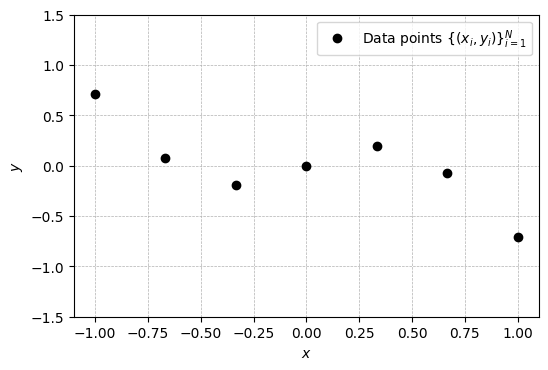

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=3$ (overdetermined) and $n=9$ (underdetermined) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$ by solving optimization problem (1) or equivalently (2) in __Exercise 1__ above.

---
__a)__ First, do this by implementing the GD method. The GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ as the initial point, and try the constant step size

1. $\gamma_{k} = 1 / \beta$,

and run for $10^5$ iterations. Here, $\beta$ is the smoothness parameter from __Exercise 1__ above. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$, (Hint: use [sequential average computation](https://math.stackexchange.com/questions/106313/regular-average-calculated-accumulatively))

as a function of iteration number $k$. Give comments:
- Describe any difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases.

_Hint:_ What is $f(\theta^{*})$ in the overdetermined and underdetermined case, respectively? 

__Solution:__ 

_Fill in your solution here!_

__a)__ As we can see in the plots above, the overdetermined case converges faster than the overdetermined one. We can also see that the overdetermined case reach a lower residual. We see this from the aveaging plots.

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X

def f(theta,X,N,Y):
    return 1/N*pow(np.linalg.norm(X@theta-Y),2)

def gradf(theta,X, N, Y):
    return 2/N*X.T@(X@theta-Y)

def GD(N, n, xs, ys, k):
    theta0 = np.zeros(n+1)
    thetaAvg0 = np.zeros(n+1)
    X = matX(xs,N,n)
    beta = 2/N*np.linalg.norm(X.T@X, 2, (0,1))
    gammak = 1/beta

    theta_list = []
    thetaAvg_list = []

    for i in range(k):
        theta1 = theta0 - gammak*gradf(theta0, X, N, ys)

        if i == 0:
            thetaAvg1 = np.zeros(n+1)
        else:
            thetaAvg1 = (i*thetaAvg0 + theta0)/(i+1)


        theta_list.append(theta0)
        thetaAvg_list.append(thetaAvg1)

        theta0 = theta1
        thetaAvg0 = thetaAvg1

    ftheta = [f(th, X, N, ys) for th in theta_list]  
    ftheta_avg = [f(th, X, N, ys) for th in thetaAvg_list]  

    ftheta_diff = ftheta- f(theta1, X, N, ys)
    fthetaAvg_diff = ftheta_avg - f(theta1, X, N, ys)
    
    return ftheta_diff, fthetaAvg_diff


N = 7
n = 3
k = pow(10,5)
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

ftheta_diff, fthetaAvg_diff = GD(N, n, xs, ys, k)

Text(0.5, 1.0, 'n=3')

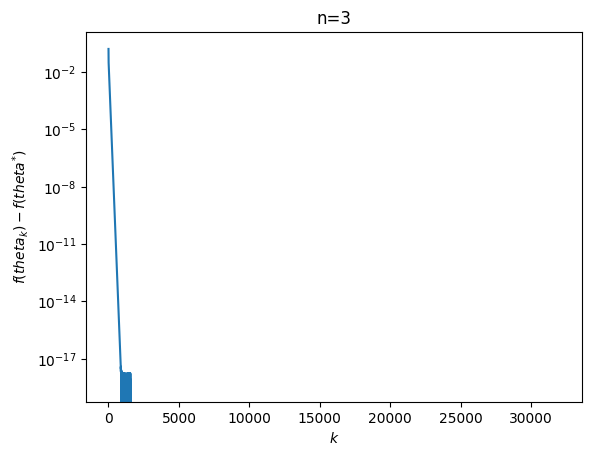

In [ ]:
k = 32000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,k,k),ftheta_diff[:k])
axes.set_xlabel('$k$')
axes.set_ylabel('$f(theta_{k})-f(theta^{*})$')
plt.title('n=3')

Text(0.5, 1.0, 'n=3')

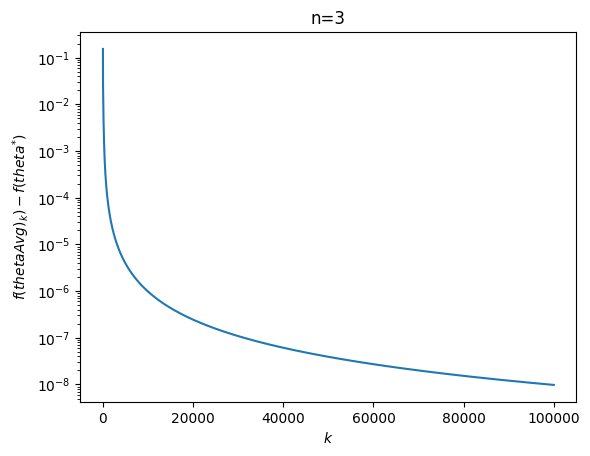

In [ ]:
k = 100000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,k,k), fthetaAvg_diff[:k])
axes.set_xlabel('$k$')
axes.set_ylabel('$f(thetaAvg)_{k})-f(theta^{*})$')
plt.title('n=3')

Text(0.5, 1.0, 'n=9')

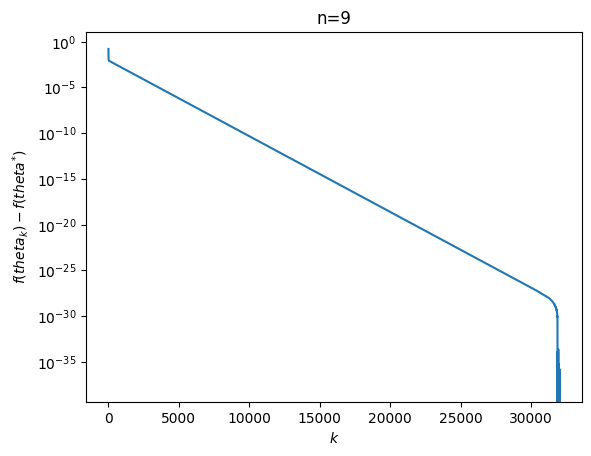

In [ ]:
k = 32000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,k,k),ftheta_diff[:k])
axes.set_xlabel('$k$')
axes.set_ylabel('$f(theta_{k})-f(theta^{*})$')
plt.title('n=9')

Text(0.5, 1.0, 'n=9')

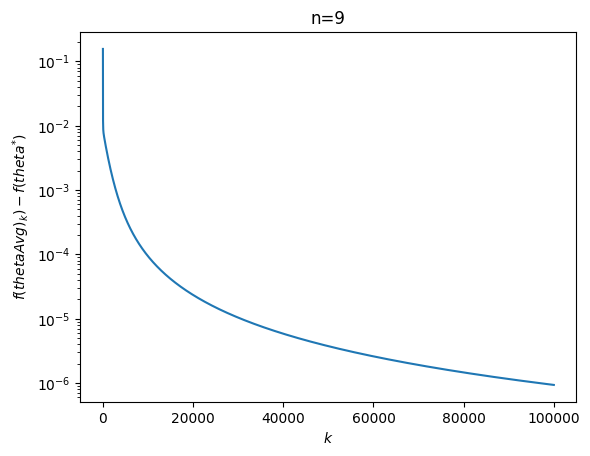

In [ ]:
k = 100000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,k,k), fthetaAvg_diff[:k])
axes.set_xlabel('$k$')
axes.set_ylabel('$f(thetaAvg)_{k})-f(theta^{*})$')
plt.title('n=9')

---
__b)__ Next, do this by implementing the SGD method. The SGD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots,N\}$ uniformly at random
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f_{i}(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ and try the step sizes

1. $\gamma_{k} = \frac{0.1}{\beta}$,
2. $\gamma_{k} = \frac{0.1}{\beta(k+1)}$,
3. $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$, where $\lfloor \cdot \rfloor$ is the floor function,

and run for $10^5 N$ iterations. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$,

as a function of iteration number $k$. Give comments:
- Does the step sizes matter? 
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
- Which combination worked best? 
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.

__Solution:__ 

_Fill in your solution here!_

1. Yes, the step size matter, as can be seen in the plots. The convergence looks very different depending on the step size.
2. Yes, the overdetermined case does not converge with these setting, as can be seen in the last two plots.
3. The best combination was the underdetermined case (n = 9) and the first gamma-option, the constant one.
4. The combination that corresponds the most to training of neural networks is the underdetermined (overparameterized) case. With this, it is probaby the most common to use a decreasing learning rate with increasing iterations, so gamma-option 1 or 2.

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X


def f(theta,X,N,Y):
    return 1/N*pow(np.linalg.norm(X@theta-Y),2)

def gradfi(theta,X, N, Y, i):
    return 2*X[i,:]*(theta.T@X[i,:]-Y[i])


def SGD(N, n, xs, ys, k):
    theta0 = np.zeros(n+1)
    X = matX(xs,N,n)
    #phi = Phi(xs,n)
    beta = 2/N*np.linalg.norm(X.T@X, 2, (0,1))

    theta_list = []
    thetaAvg_list = []

    for i in range(k):
        #gammak = 0.1/(beta*(np.floor(i/1000)+1))
        #gammak = 0.1/(beta*(i+1))
        gammak = 0.1/(beta)


        rand = np.random.randint(0,N)
        theta1 = theta0 - gammak*gradfi(theta0, X, N, ys, rand)

        if i == 0:
            thetaAvg1 = np.zeros(n+1)
        else:
            thetaAvg1 = (i*thetaAvg0 + theta0)/(i+1)


        theta_list.append(theta0)
        thetaAvg_list.append(thetaAvg1)

        theta0 = theta1
        thetaAvg0 = thetaAvg1

    ftheta = [f(th, X, N, ys) for th in theta_list]  
    ftheta_avg = [f(th, X, N, ys) for th in thetaAvg_list]  

    ftheta_diff = ftheta- f(theta1, X, N, ys)
    fthetaAvg_diff = ftheta_avg - f(theta1, X, N, ys)
    
    return ftheta_diff, fthetaAvg_diff


N = 7
n = 3
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
k = pow(10,6)

ftheta_diff, fthetaAvg_diff = SGD(N, n, xs, ys, k)

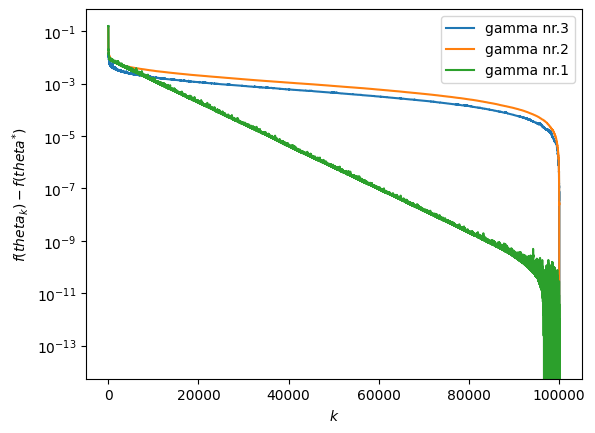

In [ ]:
k = 100000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
for x in plot_list:
    axes.plot(np.linspace(0,k,k),x)
axes.set_xlabel('$k$')
axes.set_ylabel('$f(theta_{k})-f(theta^{*})$')
axes.legend(['gamma nr.3','gamma nr.2','gamma nr.1'])

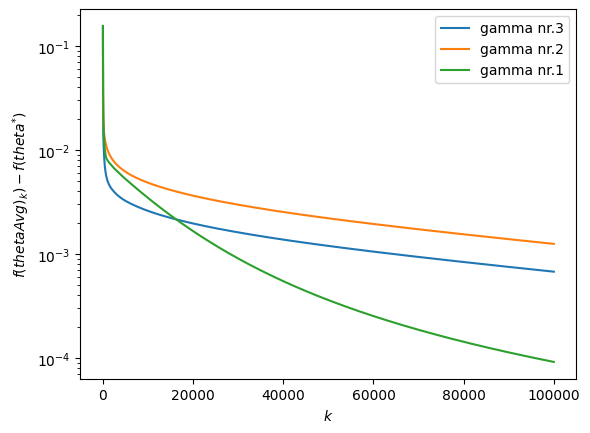

In [ ]:
k = 100000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
for x in plot_listAvg:
    axes.plot(np.linspace(0,k,k), x)
axes.set_xlabel('$k$')
axes.set_ylabel('$f(thetaAvg)_{k})-f(theta^{*})$')
axes.legend(['gamma nr.3','gamma nr.2','gamma nr.1'])

Text(0.5, 1.0, 'n=3')

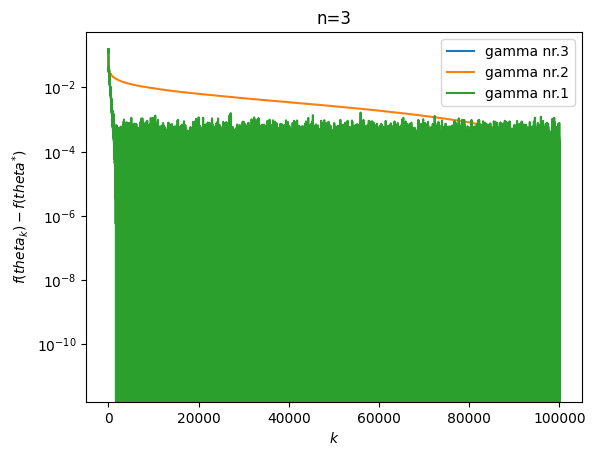

In [ ]:
k = 100000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
for x in plot_list:
    axes.plot(np.linspace(0,k,k),x)
axes.set_xlabel('$k$')
axes.set_ylabel('$f(theta_{k})-f(theta^{*})$')
axes.legend(['gamma nr.3','gamma nr.2','gamma nr.1'])
axes.set_title('n=3')

Text(0.5, 1.0, 'n=3')

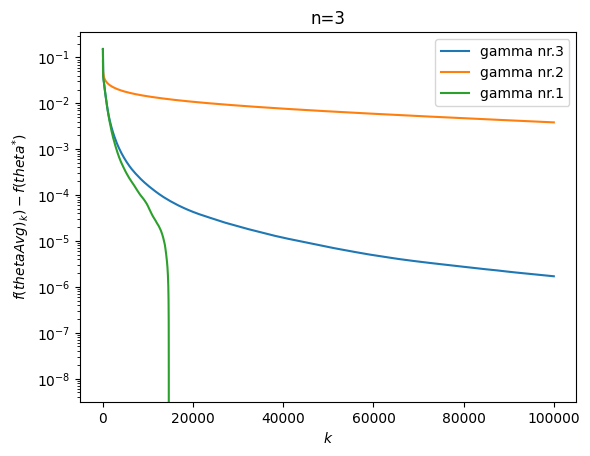

In [ ]:
k = 100000
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
for x in plot_listAvg:
    axes.plot(np.linspace(0,k,k),x)
axes.set_xlabel('$k$')
axes.set_ylabel('$f(thetaAvg)_{k})-f(theta^{*})$')
axes.legend(['gamma nr.3','gamma nr.2','gamma nr.1'])
axes.set_title('n=3')

---
### Exercise 3: Fitting points in $\mathbb{R}$ using fully connected feedforward neural networks

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:


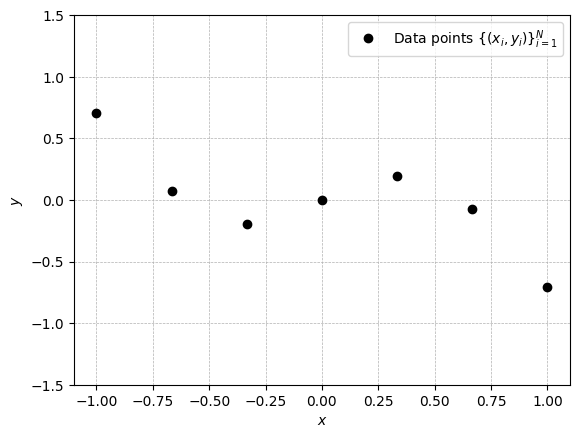

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

Polynomial fitting as in __Exercise 1__ and __Exercise 2__ gives:

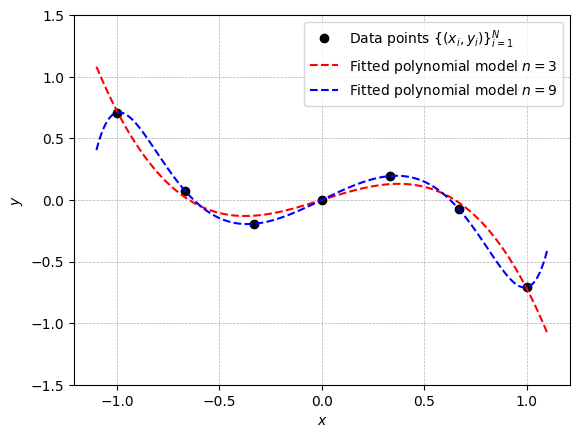

In [ ]:
theta_star_n_9 = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
theta_star_n_3 = np.array([0,  0.523557283,  0, -1.24520755])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)

axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star_n_3), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star_n_9), x),'b--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial model $n=3$', r'Fitted polynomial model $n=9$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In this exercise, we are going to explore fitting of these data points using fully connected feedforward neural networks. We will do this by considering the problem

$$
\begin{align}\label{eq:3}\tag{3}
		\underset{\theta}{\mathrm{minimize}} \frac{1}{N}\sum_{i=1}^N L(m(x_i;\theta),y_i)
\end{align}
$$

where $L:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is the least squares loss, i.e.

$$
\begin{align*}
L(u,y) = (u-y)^{2}
\end{align*}
$$

for each $u,y\in\mathbb{R}$ and $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ is a fully connected feedforward neural network model, i.e.

$$
\begin{align*}
m(x;\theta) = W_{D}\sigma_{D-1}(W_{D-1}\sigma_{D-2}(...\sigma_1(W_1 x + b_{1})...)+b_{D-1})+b_{D}	
\end{align*}
$$

for each $x\in\mathbb{R}$, where $\sigma_i$ is an activation functions that act elements-wise, for each $i=1,\ldots,D-1$, and

$$
\begin{align*}
    \theta = (W_{1},b_1,\ldots,W_{D},b_{D})
\end{align*}
$$

such that

$$
\begin{align*}
    \begin{cases}
        W_{1}\in\mathbb{R}^{f_{1} \times 1}& \text{ and }\quad b_{1} \in\mathbb{R}^{f_1}\\	
        W_{i}\in\mathbb{R}^{f_{i} \times f_{i-1}}& \text{ and }\quad b_{i} \in\mathbb{R}^{f_i} \quad\text{ for }\quad i=2,\ldots,D-1 \\
        W_{D}\in\mathbb{R}^{1 \times f_{D-1}}& \text{ and }\quad b_{D} \in\mathbb{R}.
    \end{cases}
\end{align*}
$$

In particular, we will study how the trained model $m(\cdot;\theta)$ depends on:
- The widths ($f_{i}$) and depth ($D$)
- Different activation functions ($\sigma_{i}$)
- Different initial points $\theta_{0}$ used in training
- Different training algorithms such as SGD and and Adam

We will also study:
- How the loss landscape of (3) looks along different directions at an "optimal point" of (3). (Note that we in general have no guarantees that our optimization algorithms will reach a true optimal point of (3) since the problem in nonconvex in general.)

_Remark:_
We will train the models using `pytorch`. `pytorch` is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate neural networks.

- You will need to [install](https://anaconda.org/pytorch/pytorch) `pytorch`

Take a quick look at `pytorch`'s
- [tutorials](https://pytorch.org/tutorials/)
- [documentation](https://pytorch.org/docs/stable/index.html)

---
`pytorch` expects to get data from a `DataLoader` object. Below we create a `DataLoader` and provide it with our data:

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

Typically in `pytorch`, models are defined as a child of the `nn.Module` class. Below, we create a model with:
- Depth $D=2$
- Width $f_1=10$
- ReLU as activation function 

In [ ]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model()

In machine learning, the objective function in (3) is sometimes itself called a loss function. In fact, it is already [implemented](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in `pytorch` and we create the corresponding loss function object below:

In [ ]:
loss_fn = nn.MSELoss()

`torch.optim` is a `pytorch` package implementing various optimization algorithms. Below we create an optimizer object that allows us to take a SGD step with step-size/learning rate equal to $0.05$.

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

Once we have defined the data loader, the model, the loss function and the optimizer as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one training step.

We will do this for $2000$ epochs.

In [ ]:
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.41782522201538086
Epoch: 100	Loss: 0.07382716238498688
Epoch: 200	Loss: 0.07055436819791794
Epoch: 300	Loss: 0.06815720349550247
Epoch: 400	Loss: 0.06637129932641983
Epoch: 500	Loss: 0.06491030007600784
Epoch: 600	Loss: 0.06313944607973099
Epoch: 700	Loss: 0.060412224382162094
Epoch: 800	Loss: 0.05771834775805473
Epoch: 900	Loss: 0.054790716618299484
Epoch: 1000	Loss: 0.051488570868968964
Epoch: 1100	Loss: 0.047804273664951324
Epoch: 1200	Loss: 0.04380539432168007
Epoch: 1300	Loss: 0.03938082978129387
Epoch: 1400	Loss: 0.034504059702157974
Epoch: 1500	Loss: 0.02912277914583683
Epoch: 1600	Loss: 0.02340625412762165
Epoch: 1700	Loss: 0.01889731176197529
Epoch: 1800	Loss: 0.015069564804434776
Epoch: 1900	Loss: 0.011862663552165031


Below we plot trained model:

Traing loss: 0.00920


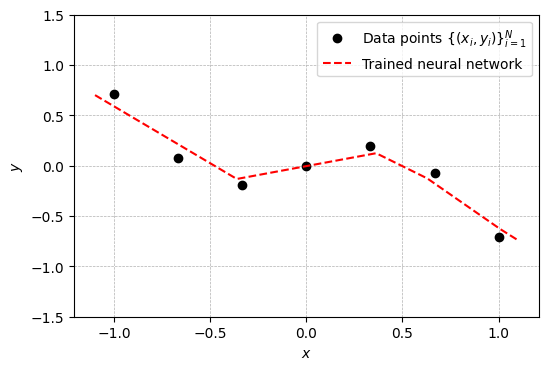

In [ ]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__a)__ First, we experiment with the widths ($f_{i}$) and depth ($D$).

Choose widths ($f_{i}$) and depth ($D$) such that:
- the network becomes underparameterized (motive why it is underparameterized)
- the network becomes overparameterized (motive why it is overparameterized)

and train the model as above.

In this subproblem, keep the activation functions fixed as ReLU. However, you are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

When we use two layers with width one we get a underparameterized network. We get a total one parameter in each layer and also a bias in both layers, meaning a total of four parameters.

Using two layers with ten features in each layer, gives a overparameterized network. We then have 31 parameters. 20 coming from the features and eleven bias terms. 

The overparameterized network reaches a much smaller loss than the underparameterized one. After 1900 epochs the underparameterized network has a loss of 0.16 whereas the overparameterized has a loss of 0.0065 after the same number of epochs. The loss in the overparameterized network is smaller, which is what we would expect. This is due to the fact that we have a lot more parameters and should then be able to fit the model the data in a more precise way. 

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

31

In [ ]:
# Write your code here
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)
        #self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        #x = F.relu(x)
        #x = self.linear3(x)
        return x

# Create an instance of the model class.
model = model()

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.1113394945859909
Epoch: 100	Loss: 0.06555317342281342
Epoch: 200	Loss: 0.06276312470436096
Epoch: 300	Loss: 0.06080267205834389
Epoch: 400	Loss: 0.058622390031814575
Epoch: 500	Loss: 0.056156545877456665
Epoch: 600	Loss: 0.05334930866956711
Epoch: 700	Loss: 0.050198715180158615
Epoch: 800	Loss: 0.046687785536050797
Epoch: 900	Loss: 0.042902763932943344
Epoch: 1000	Loss: 0.03898691385984421
Epoch: 1100	Loss: 0.035081878304481506
Epoch: 1200	Loss: 0.0312860906124115
Epoch: 1300	Loss: 0.027599504217505455
Epoch: 1400	Loss: 0.024038225412368774
Epoch: 1500	Loss: 0.01933399774134159
Epoch: 1600	Loss: 0.014537195675075054
Epoch: 1700	Loss: 0.011362005956470966
Epoch: 1800	Loss: 0.008698507212102413
Epoch: 1900	Loss: 0.0065303584560751915


In [ ]:
# Write your code here 
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=1)
        self.linear2 = nn.Linear(in_features=1, out_features=1)
        #self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        #x = F.relu(x)
        #x = self.linear3(x)
        return x

# Create an instance of the model class.
model = model()

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.7628236413002014
Epoch: 100	Loss: 0.1556757539510727
Epoch: 200	Loss: 0.1556757688522339
Epoch: 300	Loss: 0.1556757688522339
Epoch: 400	Loss: 0.1556757688522339
Epoch: 500	Loss: 0.1556757688522339
Epoch: 600	Loss: 0.1556757688522339
Epoch: 700	Loss: 0.1556757688522339
Epoch: 800	Loss: 0.1556757688522339
Epoch: 900	Loss: 0.1556757688522339
Epoch: 1000	Loss: 0.1556757688522339
Epoch: 1100	Loss: 0.1556757688522339
Epoch: 1200	Loss: 0.1556757688522339
Epoch: 1300	Loss: 0.1556757688522339
Epoch: 1400	Loss: 0.1556757688522339
Epoch: 1500	Loss: 0.1556757688522339
Epoch: 1600	Loss: 0.1556757688522339
Epoch: 1700	Loss: 0.1556757688522339
Epoch: 1800	Loss: 0.1556757688522339
Epoch: 1900	Loss: 0.1556757688522339


Traing loss: 0.15568


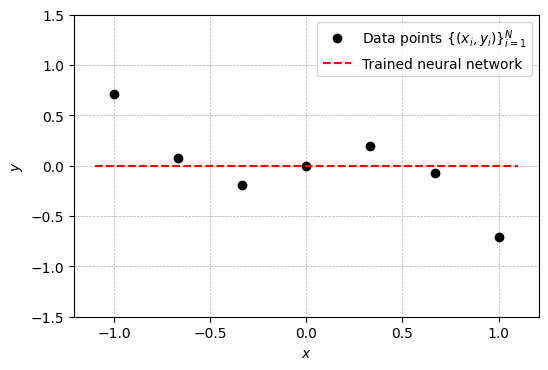

In [ ]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__b)__ Second, we will try out different activation functions ($\sigma_{i}$).

Train two overparameterized networks with the same widths and depth, using
- ReLU activation at each layer for one of the networks, and
- 4 * sigmod activation at each layer for the other network.

You are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

Using the ReLU activation gives a loss of 0.00035 after 1900 epochs. The 4 * sigmoid activation gives a loss of 0.12 after 1900 epochs. This is with two layers with ten features each. We clearly see that the ReLU get a smaller loss. 

In [ ]:
# Write your code here
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)
        #self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)*4
        #x = F.relu(x)
        x = self.linear2(x)
        #x = self.linear3(x)
        return x

# Create an instance of the model class.
model = model()

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 1.1939650774002075
Epoch: 100	Loss: 0.1507735699415207
Epoch: 200	Loss: 0.1503801792860031
Epoch: 300	Loss: 0.1499619483947754
Epoch: 400	Loss: 0.1495129019021988
Epoch: 500	Loss: 0.14902615547180176
Epoch: 600	Loss: 0.14849314093589783
Epoch: 700	Loss: 0.1479032188653946
Epoch: 800	Loss: 0.14724302291870117
Epoch: 900	Loss: 0.14649517834186554
Epoch: 1000	Loss: 0.14563681185245514
Epoch: 1100	Loss: 0.1446370780467987
Epoch: 1200	Loss: 0.1434532105922699
Epoch: 1300	Loss: 0.14202432334423065
Epoch: 1400	Loss: 0.14026105403900146
Epoch: 1500	Loss: 0.1380271017551422
Epoch: 1600	Loss: 0.13510650396347046
Epoch: 1700	Loss: 0.13114196062088013
Epoch: 1800	Loss: 0.12552133202552795
Epoch: 1900	Loss: 0.1171916201710701


Traing loss: 0.00551


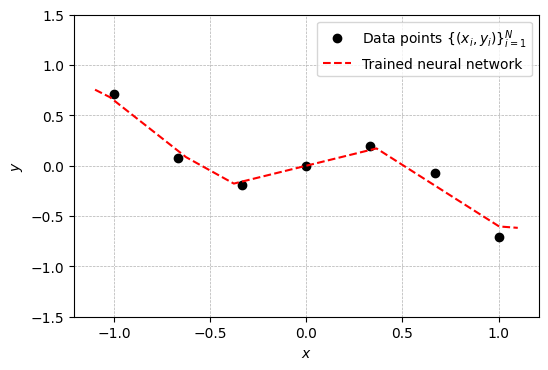

In [ ]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__c)__ Third, we consider different initial points ($\theta_{0}$) used in training.


For an overparameterized network with ReLU activation functions at each layer and fixed widths and depth, train it with different initial point (note that the constructor of `nn.Module` will initialize the parameters randomly).

Does the initial point affect the final trained network? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

The initial point does affect the final trained network. The reason for this that we have an overparameterized network. This means that there are several points that yield the same loss-value. Also since we start in different points and only run the model for 2000 epochs, there is a probability that the model wouldn't reach the same point even if it weren't overaparameterized. 

In [ ]:
# Hint: The code below prints the parameters of the network 'model'
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

        
# Write your code here
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)
        #self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        #x = torch.sigmoid(x)*4
        x = F.relu(x)
        x = self.linear2(x)
        #x = self.linear3(x)
        return x

# Create an instance of the model class.
model = model()

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))
        
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear1.weight tensor([[ 0.2550],
        [-0.9533],
        [-0.1459],
        [-0.1399],
        [ 1.5386],
        [-1.3814],
        [-0.5086],
        [ 1.1545],
        [-0.5393],
        [-0.5106]])
linear1.bias tensor([ 0.5964, -0.4718, -0.9557,  0.4392, -0.6820, -0.6564,  0.7741, -0.6457,
         0.5254,  0.6741])
linear2.weight tensor([[ 0.4012,  0.8929,  0.1090, -0.1348, -1.0883,  1.1866, -0.1704, -0.6934,
         -0.3694, -0.3419]])
linear2.bias tensor([0.3764])
linear1.weight tensor([[ 0.8727],
        [ 0.7611],
        [-0.9359],
        [ 1.2262],
        [ 0.6492],
        [ 0.8849],
        [ 0.0641],
        [ 0.8995],
        [ 0.8277],
        [-1.5922]])
linear1.bias tensor([-0.4109, -0.9772,  0.3750, -0.6785, -0.7158,  0.3121, -0.5459, -0.3186,
        -0.9426, -0.7881])
linear2.weight tensor([[-0.7470,  0.2171, -0.3770, -0.9241,  0.1748,  0.2585, -0.1958, -0.3919,
         -0.1547,  1.4204]])
linear2.bias tensor([0.0607])


__d)__ Fourth, we consider different training algorithms.

Compare
- SGD, and
- Adam (`optimizer = optim.Adam(model.parameters(), lr=0.1)`)

for an overparameterized network with ReLU activation functions at each layer and fixed widths and depth.

You are free to experiment with the learning rates and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

_Fill in your solution here!_

Adam results in a much lower loss than SGD and converges faster. SGD is much simpler. The learning rate is non-adaptive and has to be chosen in advance. Adam stores information about the previous squared gradients and the previous non-squared gradients. This acts like "friction" causing the algorithm to prefer flat minima in the loss landscape. While Adam is more advanced, it is not always favorable. The simpleness of SGD can in some cases lead to a more generelized model than when using Adam.

In [ ]:
# Write your code here
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)
        #self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        #x = torch.sigmoid(x)*4
        x = F.relu(x)
        x = self.linear2(x)
        #x = self.linear3(x)
        return x

# Create an instance of the model class.
model = model()

loss_fn = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.1)
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.30094221234321594
Epoch: 100	Loss: 6.514073174912483e-05
Epoch: 200	Loss: 1.4698736672258406e-09
Epoch: 300	Loss: 1.6843668590427706e-14
Epoch: 400	Loss: 1.38714438698527e-13
Epoch: 500	Loss: 2.6867397195928788e-14
Epoch: 600	Loss: 2.035197368705638e-13
Epoch: 700	Loss: 0.0006688692956231534
Epoch: 800	Loss: 5.364770316873546e-08
Epoch: 900	Loss: 0.0006091846153140068
Epoch: 1000	Loss: 2.350272687579036e-08
Epoch: 1100	Loss: 2.5240126828862675e-12
Epoch: 1200	Loss: 1.2564560165628791e-05
Epoch: 1300	Loss: 7.840315063845082e-09
Epoch: 1400	Loss: 3.983083665410475e-13
Epoch: 1500	Loss: 5.825261063449605e-13
Epoch: 1600	Loss: 0.0005199958104640245
Epoch: 1700	Loss: 1.092047874351465e-08
Epoch: 1800	Loss: 3.5622299923189493e-13
Epoch: 1900	Loss: 2.4349569669596116e-12


__e)__ Fifth, we study the loss landscape of a trained network along different directions in parameter space.  


Train an overparameterized network with ReLU activation functions at each layer. Denote it by $m(\cdot,\theta^{*})$ where $\theta^{*}$ are the learned parameters. Sample $\Delta$, with the same size as $\theta^{*}$, from a standard normal distribution (and keep it fixed). Plot 

$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)
\end{align*}
$$

as a function of $t\in[-1,1]$ (or even a larger interval). 

Do the same for another network with the same widths and depth, but using 4 * sigmoid activation functions at each layer. 

How does these two cases differ? Give a qualitative analysis. 

_Hints:_ You can get the parameters as a dictionary of a model by using `model.state_dict()`, updating the parameters in the dictionary, and then loading the updated parameters into the model using `model.load_state_dict(...)`. If you use this approach it is helpful to know the difference between [a shallow copy and a deep copy of a dictionary](https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/) You might need to cut off values of the loss that are too high to get a nice plot.

_Optional:_ Plot in two direction at the same time, i.e. plot 
$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta_{t} + s \Delta_{s}\right),y_i\right)
\end{align*}
$$

as a function of $t,s\in[-1,1]$. 

__Solution:__ 

_Fill in your solution here!_

We can see that the loss is larger when $|t|$ is larger. This is reasonable. Since we fit the model to minimixe the loss, it will be worse when we alter the parameters. A larger $t$ means a larger change in the model parameters, and most likely also a bigger loss. However, we see in the case for ReLU that the negative $t$s doesn't affect the loss that much. This is probably due to how the weight matrix and the minima looks. Also the 4 * sigmoid is affected more by the alternation. The effect is also almost the same for negative and positive values of $t$ for the 4 * sigmoid model. 

In [8]:
# Write your code here
import copy
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)
        #self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)*4
        #x = F.relu(x)
        x = self.linear2(x)
        #x = self.linear3(x)
        return x

# Create an instance of the model class.
model = model()
temp_model = copy.deepcopy(model)

loss_fn = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.1)
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))
params = model.state_dict()
rand = copy.deepcopy(params)
for key in params.keys():
    if len(params[key].size()) <2:
        rand[key] = torch.randn(params[key].size(dim=0))
    else:
        rand[key] = torch.randn(params[key].size(dim=0),params[key].size(dim=1))

def loss_calc(params,rand,i):
    theta_s = copy.deepcopy(params)
    for key in theta_s.keys():
        term = i*rand[key]
        theta_s[key] = torch.add(theta_s[key], term)
       

    temp_model.load_state_dict(theta_s)
            # 1. These are the sampled batches of inputs and ground-truth
    batch_x, batch_y = batch

            # 2. Compute the model's prediction on the batch
    pred = temp_model(batch_x)

            # 3. Compute the loss of the prediction w.r.t. ground-truth
    loss = loss_fn(pred, batch_y)
    return loss

space = 100
t = np.linspace(-1, 1, space)
loss_vec = np.zeros(space)
for k in range(len(t)):
    loss_vec[k] = loss_calc(params,rand,t[k])


Epoch: 0	Loss: 2.8698790073394775
Epoch: 100	Loss: 0.06821829825639725
Epoch: 200	Loss: 0.06809218227863312
Epoch: 300	Loss: 0.06802286207675934
Epoch: 400	Loss: 0.067948117852211
Epoch: 500	Loss: 0.06771130859851837
Epoch: 600	Loss: 0.056323982775211334
Epoch: 700	Loss: 5.351239087758586e-05
Epoch: 800	Loss: 2.788011079246644e-05
Epoch: 900	Loss: 1.7239395674550906e-05
Epoch: 1000	Loss: 9.67835421761265e-06
Epoch: 1100	Loss: 4.8685546971682925e-06
Epoch: 1200	Loss: 2.2288936634140555e-06
Epoch: 1300	Loss: 9.399088298778224e-07
Epoch: 1400	Loss: 3.667838086585107e-07
Epoch: 1500	Loss: 1.3263638720673043e-07
Epoch: 1600	Loss: 4.4685371847208444e-08
Epoch: 1700	Loss: 1.018422501886107e-08
Epoch: 1800	Loss: 1.0365090119535125e-08
Epoch: 1900	Loss: 4.968634215174461e-08


Traing loss: 0.00029


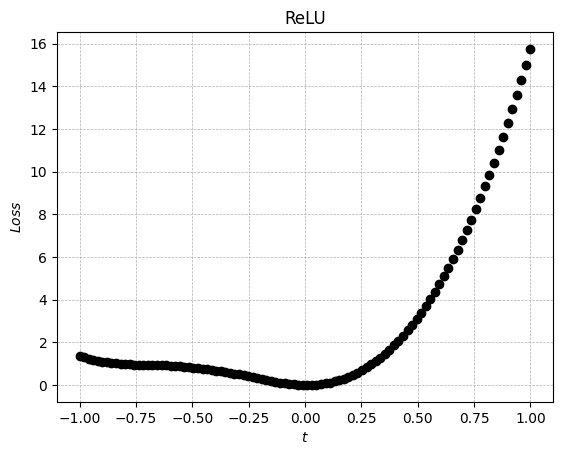

In [7]:
with torch.no_grad():    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(t,loss_vec,'ko')
    axes.set_xlabel('$t$')
    axes.set_ylabel('$Loss$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    plt.title('ReLU')
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

Traing loss: 0.00001


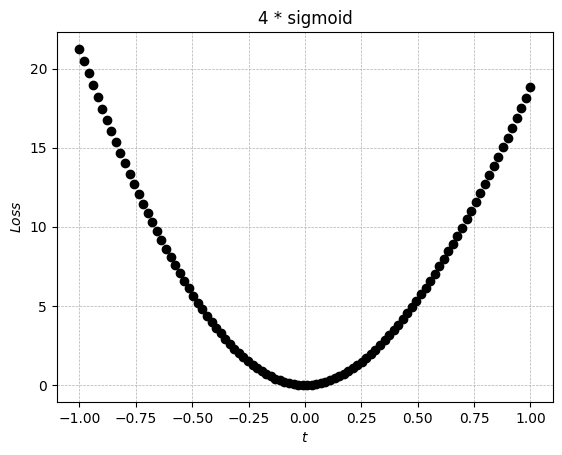

In [9]:
with torch.no_grad():    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(t,loss_vec,'ko')
    axes.set_xlabel('$t$')
    axes.set_ylabel('$Loss$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    plt.title('4 * sigmoid')
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

In [ ]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

---
### Exercise 4: Implicit regularization via small norm in polynomial fitting in $\mathbb{R}$
_Remark:_ You should solve this exercise using `numpy` primarily.

The purpose of this exercise is to study optimization problems in the overparameterized regime, i.e., when there are multiple solutions to choose from, and see how the norm of a given solution may affect generalization.   

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

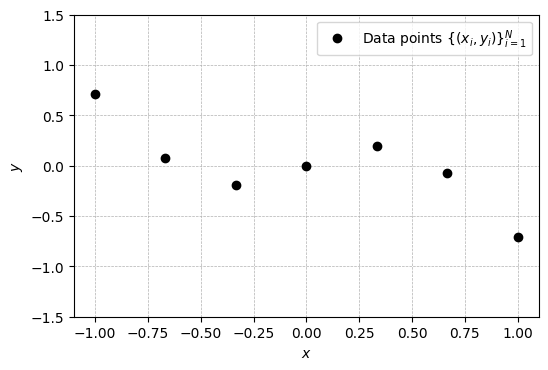

In [ ]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=9$ (overparameterized) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$. One solution $m(\cdot;\theta^{*})$ is given below:

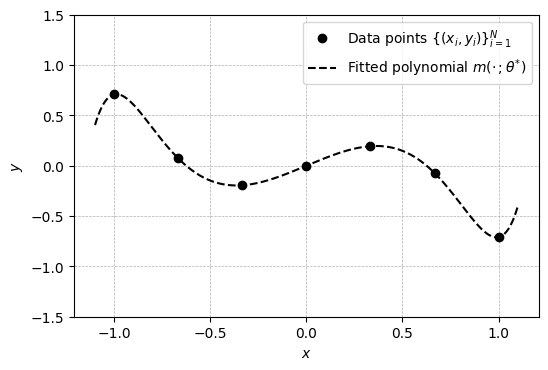

In [ ]:
theta_star = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__a)__ Recall from __Exercise 1__ __g)__ that given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the Euclidean projection formula $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$. Initialize $a$ randomly and compute the projection $\theta^{*}$ and plot the fitted polynomial $m(\cdot;\theta^{*})$ as above. Vary the magnitude or norm of $\theta^{*}$ indirectly by multiplying $a$ by $0$, $10$, $100$ and $1000$. Visually, how does the generalization of $m(\cdot;\theta^{*})$ correspond to the norm of $\theta^{*}$?

__Solution:__ 

_Fill in your solution here!_

Larger a's causes much larger variations. That the generalization becomes worse makes sense. If the norm is increased a lot, small changes will give larger effect. 

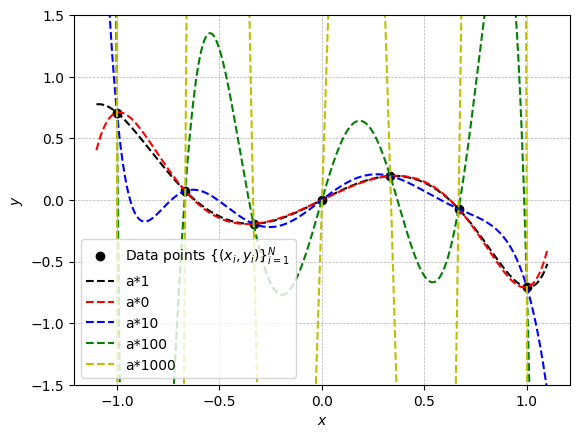

In [ ]:
# Write your code here
def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X

n = 9 # degree
a = np.random.randn(n + 1)

X = matX(xs,N,n)
theta_star = a - X.T@np.linalg.inv(X@X.T)@(X@a-ys)
theta_star1 = a*0 - X.T@np.linalg.inv(X@X.T)@(X@a*0-ys)
theta_star2 = a*10 - X.T@np.linalg.inv(X@X.T)@(X@a*10-ys)
theta_star3 = a*100 - X.T@np.linalg.inv(X@X.T)@(X@a*100-ys)
theta_star4 = a*1000 - X.T@np.linalg.inv(X@X.T)@(X@a*1000-ys)

x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.plot(x, np.polyval(np.flip(theta_star1), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star2), x),'b--')
axes.plot(x, np.polyval(np.flip(theta_star3), x),'g--')
axes.plot(x, np.polyval(np.flip(theta_star4), x),'y--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$','a*1','a*0','a*10','a*100','a*1000'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

__b)__ Implement the GD method for optimization problem (2) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 1/\beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the GD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.

_Remark:_ We consider $\theta_{k}$ to have converged to $\theta^{*}$ if $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.


__Solution:__ 

_Fill in your solution here!_

In [ ]:
# Write your code here
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X

def f(theta,X,N,Y):
    return 1/N*pow(np.linalg.norm(X@theta-Y),2)

def gradfi(theta,X, N, Y, i):
    return 2*X[i,:]*(theta.T*X[i,:]-Y[i])

def GD(N, n, xs, ys, theta0):
    X = matX(xs,N,n)
    beta = 2/N*np.linalg.norm(X.T@X, 2, (0,1))
    gammak = 1/beta

    theta1 = theta0 - gammak*gradf(theta0, X, N, ys)
    return theta1

N = 7
n = 9
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
a = np.zeros(n+1)
X = matX(xs,N,n)
theta_star = a - X.T@np.linalg.inv(X@X.T)@(X@a-ys)
thetak = []
theta1 = np.zeros(n+1)

while pow(np.linalg.norm(theta1-theta_star),2) > pow(10,-16):
    theta1= GD(N, n, xs, ys, theta1)
    thetak.append(theta1)
    
thetadiff = [pow(np.linalg.norm(x-theta_star),2) for x in thetak]

Text(0, 0.5, 'Squared 2-norm of: $theta_{k}-theta^{*}$')

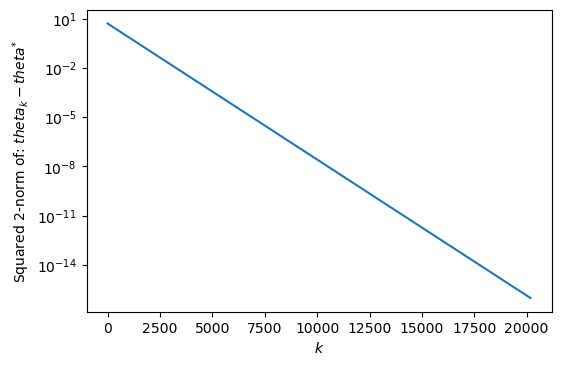

In [ ]:
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,len(thetadiff),len(thetadiff)), thetadiff)
axes.set_xlabel('$k$')
axes.set_ylabel('Squared 2-norm of: $theta_{k}-theta^{*}$')

---

__c)__ Implement the SGD method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 0.1 / \beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the SGD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.


__Solution:__ 


_Fill in your solution here!_

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X

def f(theta,X,N,Y):
    return 1/N*pow(np.linalg.norm(X@theta-Y),2)

def gradfi(theta,X, N, Y, i):
    return 2*X[i,:]*(theta.T@X[i,:]-Y[i])

def SGD(N, n, xs, ys, theta0):
    X = matX(xs,N,n)
    beta = 2/N*np.linalg.norm(X.T@X, 2, (0,1))
    gammak = 0.1/beta
    
    rand = np.random.randint(0,N)
    theta1 = theta0 - gammak*gradfi(theta0, X, N, ys,rand)
    return theta1

N = 7
n = 9
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
a = np.zeros(n+1)
X = matX(xs,N,n)
theta_star = a - X.T@np.linalg.inv(X@X.T)@(X@a-ys)
thetak = []
theta1 = np.zeros(n+1)
i = 0
while pow(np.linalg.norm(theta1-theta_star),2) > pow(10,-16):
    theta1 = SGD(N, n, xs, ys, theta1)
    thetak.append(theta1)
    i = i + 1
    if i % 10000 == 0:
        print(pow(np.linalg.norm(theta1-theta_star),2))
    
thetadiff = [pow(np.linalg.norm(x-theta_star),2) for x in thetak]

Text(0, 0.5, 'Squared 2-norm of: $theta_{k}-theta^{*}$')

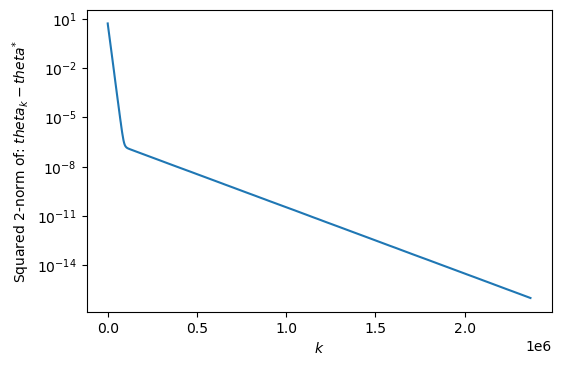

In [ ]:
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,len(thetadiff),len(thetadiff)), thetadiff)
axes.set_xlabel('$k$')
axes.set_ylabel('Squared 2-norm of: $theta_{k}-theta^{*}$')

---

__d)__ The ADAM optimization method is given by:

- Pick $\theta_{0}\in\mathbb{R}^{n+1}$, $\hat{m}_{0}=\hat{v}_{0}=0\in\mathbb{R}^{n+1}$, $b_{m},b_{v}\in(0,1)$ and $\gamma,\epsilon>0$.
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots, N\}$ uniformly at random
    - Set $g_{k+1} = \nabla f_{i}(\theta_{k})$
    - Set $\hat{m}_{k+1} = b_{m}\hat{m}_{k}+(1-b_{m})g_{k+1}$
    - Set $\hat{v}_{k+1} = b_{v}\hat{v}_{k}+(1-b_{v})g_{k+1}^{2}$ (element-wise square)
    - Set $m_{k+1}=\hat{m}_{k+1}/(1-b_{m}^{k+1})$
    - Set $v_{k+1}=\hat{v}_{k+1}/(1-b_{v}^{k+1})$
    - Set $\theta_{k+1} = \theta_{k} - \gamma m_{k+1} ./ (\sqrt{v_{k+1}} + \epsilon\mathbb{1})$ (element-wise division and square root)

Use the [suggested values](https://arxiv.org/pdf/1412.6980.pdf):

- $b_{m} = 0.9$
- $b_{v} = 0.999$
- $\gamma = 0.001$
- $\epsilon = 10^{-8}$

Implement the ADAM optimization method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$. Does ADAM converge to the minimum norm solution? Plot the resulting model.

__Solution:__ 


_Fill in your solution here!_

The model does not converge to the minimum solution. It seems to stop slightly below $10^{-1}$.

In [10]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X


def gradfi(theta,X, N, Y, i):
    return 2*X[i,:]*(theta.T@X[i,:]-Y[i])


def ADAM(n, N, xs, ys, X, theta0, mhat0, vhat0, bm, bv, k, eps, gamma):
    i = np.random.randint(0,N)
    g1 = gradfi(theta0, X, N, ys, i)
    mhat1 = bm*mhat0+(1-bm)*g1
    vhat1 = bv*vhat0+(1-bv)*np.square(g1)
    m1 = mhat1/(1-pow(bm,k+1))
    v1 = vhat1/(1-pow(bv,k+1))
    theta1 = theta0 - np.divide(gamma*m1,np.sqrt(v1)+eps*np.ones(n+1))

    
    return theta1, mhat1, vhat1
            
n = 9
N = 7
theta1 = np.zeros(n+1)
mhat1 = np.zeros(n+1) 
vhat1 = np.zeros(n+1)
a = np.zeros(n+1)
bm = 0.9
bv = 0.999
gamma = 0.001
eps = pow(10,-8)
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
X = matX(xs,N,n)

theta_star = a - X.T@np.linalg.inv(X@X.T)@(X@a-ys)
thetak = []


k = 0
while pow(np.linalg.norm(theta1-theta_star),2) > pow(10,-16) and k < pow(10,6):
    theta1, mhat1, vhat1 = ADAM(n, N, xs, ys, X, theta1, mhat1, vhat1, bm, bv, k, eps, gamma)
    thetak.append(theta1)
    k = k + 1
    if k % 100000 == 0:
        print(pow(np.linalg.norm(theta1-theta_star),2))
    
thetadiff = [pow(np.linalg.norm(theta-theta_star),2) for theta in thetak]


0.054894845098472145
0.05489142045876799
0.05488635308867988
0.05488157822102765
0.05488332180493233
0.054875955208591363
0.05487817892169983
0.054874357394685304
0.05487891957015166
0.054876772182401175


Text(0, 0.5, 'Squared 2-norm of: $theta_{k}-theta^{*}$')

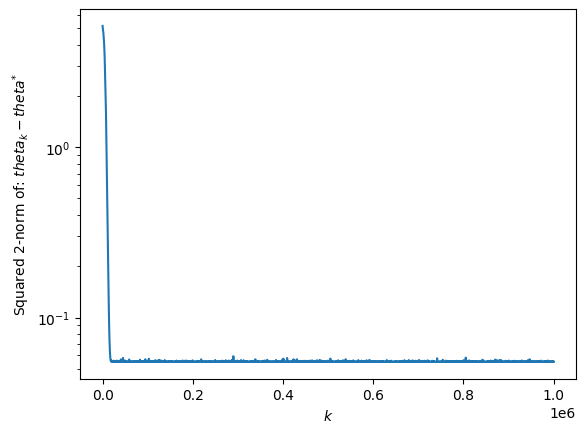

In [11]:
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,len(thetadiff),len(thetadiff)), thetadiff)
axes.set_xlabel('$k$')
axes.set_ylabel('Squared 2-norm of: $theta_{k}-theta^{*}$')

---

__e)__ The ADAM optimization method scales the gradient independently in each coordinate. We call such methods diagonally scaled methods. 

Now, recall the scaled projection problem from __Exercise 1__ __g)__ above: given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the scaled projection formula $\theta^{*} = a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$.


Consider the candidate point $a\in\mathbb{R}^{n+1}$ and the highly skewed diagonal scaling matrix $H\in\mathbb{S}^{n+1}_{++}$ below:

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
n = 9
a = np.zeros(n + 1)
H_inv = np.diag(np.logspace(-10, 10, num = n + 1)) # the inverse of H

Plot the data points $\{(x_{i},y_{i})\}_{i=1}^{N}$ and the fitted polynomial $m(\cdot;\theta^{*})$ in the same figure using the scaled projection formula. Visually, does the fitted polynomial $m(\cdot;\theta^{*})$ seem to generalize well?

__Solution:__ 

_Fill in your solution here!_

It does not seem to generalize that well. Especially around the two first and the two last point the generalization is quite poor. It seems like the polynomial might be of a too high order. 

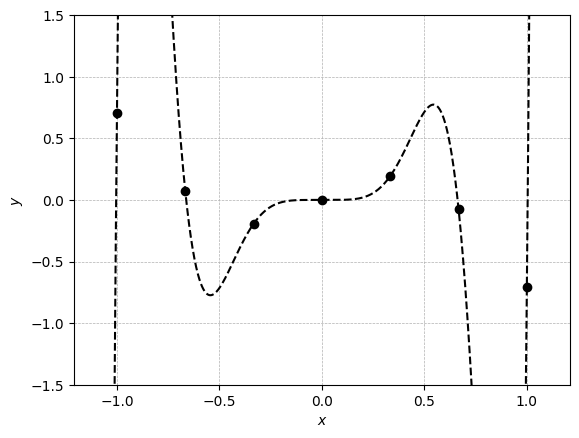

In [ ]:
# Write your code here
def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X

def f(theta,X,N,Y):
    return 1/N*pow(np.linalg.norm(X@theta-Y),2)

N = 7
xs = np.linspace(-1, 1, num=N) # the x_i's
x = np.linspace(-1.1, 1.1, num = 1000)
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
X = matX(xs,N,n)

theta_star = a - H_inv@X.T@np.linalg.inv((X@H_inv@X.T))@(X@a-ys)

f_pol = f(theta_star, X, N, ys)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__f)__ The scaled GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$ and $H\in\mathbb{S}_{+}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} H^{-1}\nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

For numerical reasons (i.e., so that the algorithm converges in reasonable time), consider the less skewed diagonal scaling matrix below:

In [ ]:
H_inv = np.diag(np.logspace(-3, 0, num = n + 1)) # the inverse of H

Starting at $\theta_{0}=0$ and using the step size $\gamma_{k}=1/\beta_{H}$, show that the scaled GD method converges to the scaled projection point $\theta^{*}=a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$ for $a=0$.

Here, $\beta_{H}$ is given by

\begin{align}
    \beta_{H} = \frac{2}{N}\left\lVert H^{-\frac{1}{2}}X^{T}X H^{-\frac{1}{2}} \right\rVert_{2},
\end{align}

where $H^{-\frac{1}{2}}$ is the symmetric square root of $H^{-1}$.

__Solution:__ 

_Fill in your solution here!_

In [ ]:
# Write your code here
def matX(xs,N,n):
    X = np.zeros((N,n+1))
    for k in range(N):
        xi = xs[k]
        for i in range(n+1):
            X[k,i] = xi**i
    return X

def f(theta,X,N,Y):
    return 1/N*pow(np.linalg.norm(X@theta-Y),2)

def gradf(theta,X, N, Y):
    return 2/N*X.T@(X@theta-Y)

N = 7
n=9
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's
X = matX(xs,N,n)

theta1 = np.zeros(n+1)
thetas = []
diffs = []
a = np.zeros(n+1)
theta_star = a - H_inv@X.T@np.linalg.inv((X@H_inv@X.T))@(X@a-ys)


H_sqrt = np.sqrt(H_inv)
beta = 2/N*np.linalg.norm(H_inv@X.T@X@H_inv)
gamma = 1/beta


while pow(np.linalg.norm(theta1-theta_star),2) > pow(10,-16):
    fg = gradf(theta1, X, N, ys)
    theta1 = theta1 - gamma*H_inv@fg
    thetas.append(theta1)
    diffs.append(pow(np.linalg.norm(theta1-theta_star),2))
    
print(pow(np.linalg.norm(theta1-theta_star),2))

9.998376251927927e-17


Text(0, 0.5, 'Squared 2-norm of: $theta_{k}-theta^{*}$')

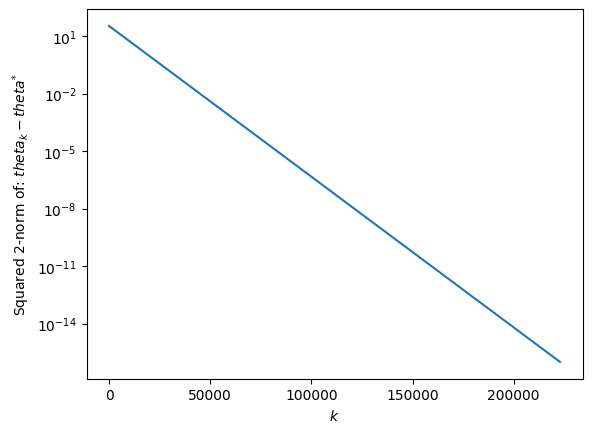

In [ ]:
fig, axes = plt.subplots(dpi=100)
axes.set_yscale('log')
axes.plot(np.linspace(0,len(diffs),len(diffs)), diffs)
axes.set_xlabel('$k$')
axes.set_ylabel('Squared 2-norm of: $theta_{k}-theta^{*}$')

---
### Exercise 5: Implicit regularization via flatness
_Remark:_ You should solve this exercise using `numpy` primarily.

It has been observed in the [literature](https://arxiv.org/pdf/1609.04836.pdf) that flat mimima tend to lead to better generalization than sharp minima. In this exercise, we empirically verfiy that SGD tends to favour flat mimima.

Consider the finite-sum problem problem
$$
\begin{equation}
\begin{aligned}
& \underset{x\in\mathbb{R}}{\mathrm{minimize}}
& & f(x)= \frac{1}{N} \sum_{i=1}^{N}f_{i}(x)
\end{aligned}
\end{equation}
$$
where the $f_{i}$'s and $f$ are given below: (the derivatives are also given for convenience.)

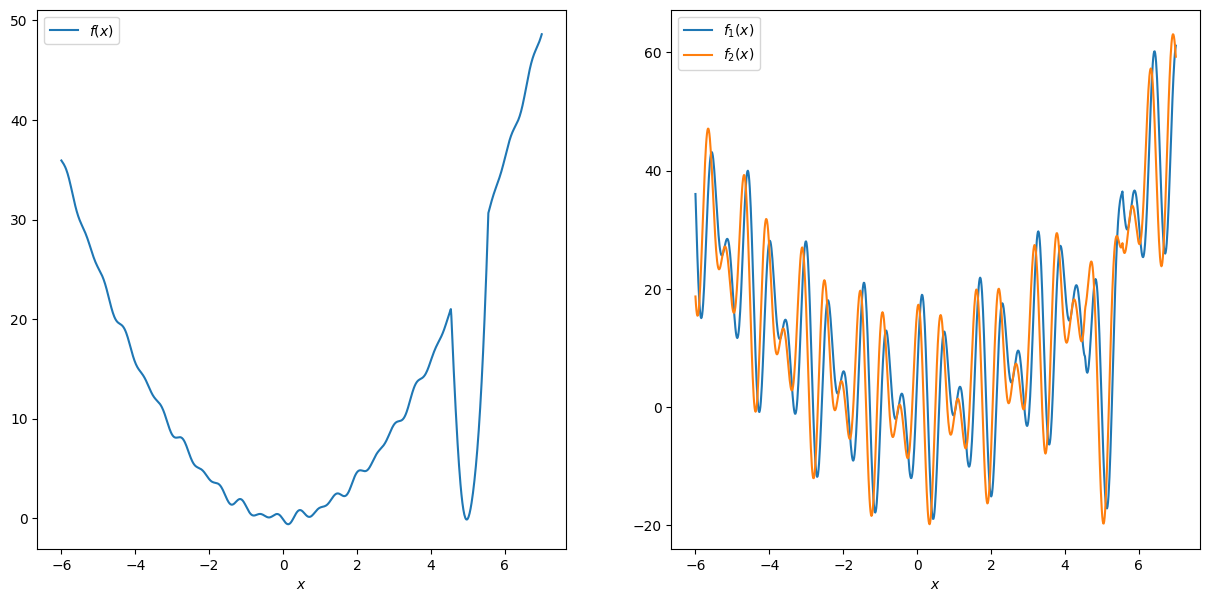

In [ ]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt


def loss_term(phase, x):
    if x < 50/11:
        value = x**2
    elif x < 50/9:
        value = 100*(x - 5)**2
    else:
        value = x**2
    return value + 20*np.sin(10*x + phase)*np.cos(2*(x - 5))

def derivative_of_loss_term(phase, x):
    if x < 50/11:
        value = 2*x
    elif x < 50/9:
        value = 200*(x - 5)
    else:
        value = 2*x
    return value + 20*(10*np.cos(10*x + phase)*np.cos(2*(x - 5)) - 2*np.sin(10*x + phase)*np.sin(2*(x - 5)))

N = 2000 # the number of summands
np.random.seed(0)
phases = 2 * np.pi * np.random.rand(N)

# The induvidual summands f_i as a list
f_i_s = list(map(lambda phase : np.vectorize(partial(loss_term, phase)), phases))

# The function f
f = np.vectorize(lambda x : np.mean([f_i(x) for f_i in f_i_s]))

# Derivatives are provided for convenience
derivative_f_i_s = list(map(lambda phase : np.vectorize(partial(derivative_of_loss_term, phase)), phases))
derivative_f = np.vectorize(lambda x : np.mean([d_f_i(x) for d_f_i in derivative_f_i_s]))

x = np.linspace(-6, 7, num=1000)
y_1 = f_i_s[0](x)
y_2 = f_i_s[1](x)
y = f(x)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(x, y)
axes[0].legend(["$f(x)$"])
axes[0].set_xlabel('$x$')
axes[1].plot(x, y_1)
axes[1].plot(x, y_2)
axes[1].legend(["$f_{1}(x)$", "$f_{2}(x)$"])
axes[1].set_xlabel('$x$');

Note that the function $f$ has a flat minimum close to $0$ and a sharp minimum close to $5$. Implement both GD and SGD for this problem: 

- Start at $x_{0}=5$, i.e., close to the sharp minimum. 
- Let both GD and SGD go for $2000$ iterations.
- Use the same constant step size $\gamma_{k} = 0.001$ for SGD and GD. 
- You should notice that SDG manages to escape the sharp minimum and find the flat minimum (most of the time), while GD does not. Illustrate this by plotting $x_{k}$ as a function of $k$ for both methods.  (Common mistake: We are not asking for $f(x_k)$ vs $x_k$.)

Give some brief comments.

__Solution:__

_Fill in your solution here!_

For the GD, the gradient is always going to be too small for the algorithm to escape the sharp minimum close to 5. Since the choice of gradient is stochastic for SGD, the algorithm can sometime take larger "leaps", resulting in an escape. As we can see in plot down below, SGD struggles for quite some time anyway. At iteration ca. 1400, it escapes the sharp minimum and ends up in the flater minimum.

In [ ]:
# Write your code here
# Write your code here
import numpy as np
import matplotlib.pyplot as plt

def SGD(x0):
    gammak = 0.001
    rand = np.random.randint(0,len(derivative_f_i_s))
    x1 = x0 - gammak*derivative_f_i_s[rand](x0)
    
    return x1

def GD(x0):
    gammak = 0.001
    x1 = x0 - gammak*derivative_f(x0)
    return x1

x1SGD = 5
x1GD = 5

x1SGD_list = []
x1GD_list = []

for k in range(1999):
    x1SGD = SGD(x1SGD)
    x1SGD_list.append(x1SGD) 
    x1GD = GD(x1GD)
    x1GD_list.append(x1GD)


-0.45110040572626825


Text(0.5, 0, '$x$')

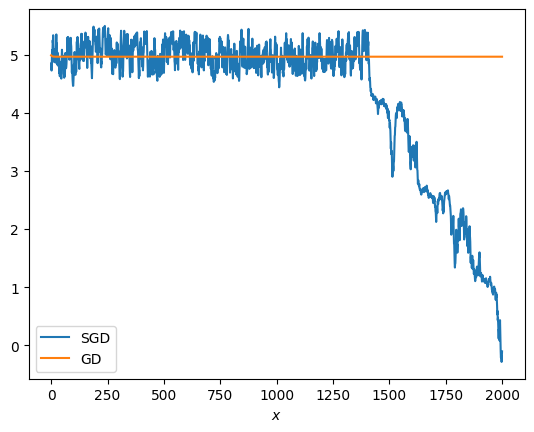

In [ ]:
fig, axes = plt.subplots(dpi=100)
axes.plot(np.linspace(0,k+1,k+1),x1SGD_list)
axes.plot(np.linspace(0,k+1,k+1),x1GD_list)
axes.legend(["SGD","GD"])
axes.set_xlabel('$x$')